In [1]:
import pandas as pd

from app.config import technologies

# Prefix for IDE to properly handle location of the file bases on launch method
location_prefix = "../"
file_path = "scrapped_data/"

if "file_name" in globals():
    df = pd.read_csv(file_path + file_name)
    location_prefix = ""
else:
    # modify the name, if necessary, to manually run the notebook
    file_name = "example.csv"
    df = pd.read_csv(location_prefix + file_path + file_name)
    print(location_prefix + file_path + file_name)

plots = []

df.head()

../scrapped_data/example.csv


,Position,Experience,Company,Location,Date,Details
0,"Backend developer (Python, PHP)",from 3 to 5 years,Zviger LLC,віддалено,6 вересня,"Привіт, майбутній колего! Ми — американська IT..."
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",28 серпня,Apriorit — компанія з розробки програмного заб...
2,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2 вересня,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
3,Automation QA Engineer (Python) Freelance,from 3 to 5 years,Lemberg Solutions,"Львів, Луцьк, Рівне, віддалено",6 вересня,"Lemberg Solutions is, above all, a group of pa..."
4,Python Developer у Стартап,below year,ESUPPORT,NaN,19 серпня,Компанія ESUPPORT спеціалізується на B2B лідог...


In [2]:
from datetime import datetime


month_translation = {
    "січня": "January",
    "лютого": "February",
    "березня": "March",
    "квітня": "April",
    "травня": "May",
    "червня": "June",
    "липня": "July",
    "серпня": "August",
    "вересня": "September",
    "жовтня": "October",
    "листопада": "November",
    "грудня": "December"
}

def convert_date(date_str):
    day, month_ukr = date_str.split()
    month_eng = month_translation[month_ukr]
    date_str_eng = f"{day} {month_eng} {datetime.now().year}"
    return datetime.strptime(date_str_eng, "%d %B %Y").date()

df["Date"] = df["Date"].apply(convert_date)
df.head()

,Position,Experience,Company,Location,Date,Details
0,"Backend developer (Python, PHP)",from 3 to 5 years,Zviger LLC,віддалено,2024-09-06,"Привіт, майбутній колего! Ми — американська IT..."
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",2024-08-28,Apriorit — компанія з розробки програмного заб...
2,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
3,Automation QA Engineer (Python) Freelance,from 3 to 5 years,Lemberg Solutions,"Львів, Луцьк, Рівне, віддалено",2024-09-06,"Lemberg Solutions is, above all, a group of pa..."
4,Python Developer у Стартап,below year,ESUPPORT,NaN,2024-08-19,Компанія ESUPPORT спеціалізується на B2B лідог...


In [3]:
df.dropna(inplace=True)
df.head()

,Position,Experience,Company,Location,Date,Details
0,"Backend developer (Python, PHP)",from 3 to 5 years,Zviger LLC,віддалено,2024-09-06,"Привіт, майбутній колего! Ми — американська IT..."
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",2024-08-28,Apriorit — компанія з розробки програмного заб...
2,Python Developer,below year,HOLYWATER,"Київ, за кордоном, віддалено",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
3,Automation QA Engineer (Python) Freelance,from 3 to 5 years,Lemberg Solutions,"Львів, Луцьк, Рівне, віддалено",2024-09-06,"Lemberg Solutions is, above all, a group of pa..."
5,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",віддалено,2024-08-19,"УНКД — це унікальний проект, що живе питанням..."


In [4]:
df["Location"] = df["Location"].apply(lambda x: [loc.strip() for loc in x.split(",")])
df.head()

,Position,Experience,Company,Location,Date,Details
0,"Backend developer (Python, PHP)",from 3 to 5 years,Zviger LLC,[віддалено],2024-09-06,"Привіт, майбутній колего! Ми — американська IT..."
1,Junior Python розробник,below year,Apriorit,"[Київ, Дніпро, віддалено]",2024-08-28,Apriorit — компанія з розробки програмного заб...
2,Python Developer,below year,HOLYWATER,"[Київ, за кордоном, віддалено]",2024-09-02,ЗУСТРІЧАЙТЕ СВОЮ МАЙБУТНЮ КОМАНДУ! Ви будете п...
3,Automation QA Engineer (Python) Freelance,from 3 to 5 years,Lemberg Solutions,"[Львів, Луцьк, Рівне, віддалено]",2024-09-06,"Lemberg Solutions is, above all, a group of pa..."
5,Стажер Python Developer для УНКД,below year,"ГО ""УНКД""",[віддалено],2024-08-19,"УНКД — це унікальний проект, що живе питанням..."


<h3>Collection of statistics on technology in high demand</h2>

In [5]:
import re

def extract_technologies(text):
    found_technologies = []
    for tech in technologies:
        if re.search(r"\b" + re.escape(tech) + r"\b", text, re.IGNORECASE):
            found_technologies.append(tech)
    return found_technologies

df_technologies = df.drop(["Details", "Company", "Date", "Location", "Position"], axis=1)
df_technologies["Technologies"] = df["Details"].apply(lambda x: extract_technologies(str(x)))

df_technologies.set_index("Experience", inplace=True)

df_technologies

,Technologies
Experience,
from 3 to 5 years,"[SQL, Docker, JavaScript, RabbitMQ, PHP]"
below year,"[Python, Flask, Docker, Kubernetes, AWS, Git]"
below year,"[Python, SQL]"
from 3 to 5 years,"[Python, SQL, Docker]"
below year,[Python]
...,...
from 1 to 3 years,"[Python, SQL, MongoDB, Docker, Linux, Git, Jav..."
from 1 to 3 years,"[Python, Django, Flask, SQL, PostgreSQL, AWS, ..."
from 1 to 3 years,"[Python, SQL, PostgreSQL, Git]"


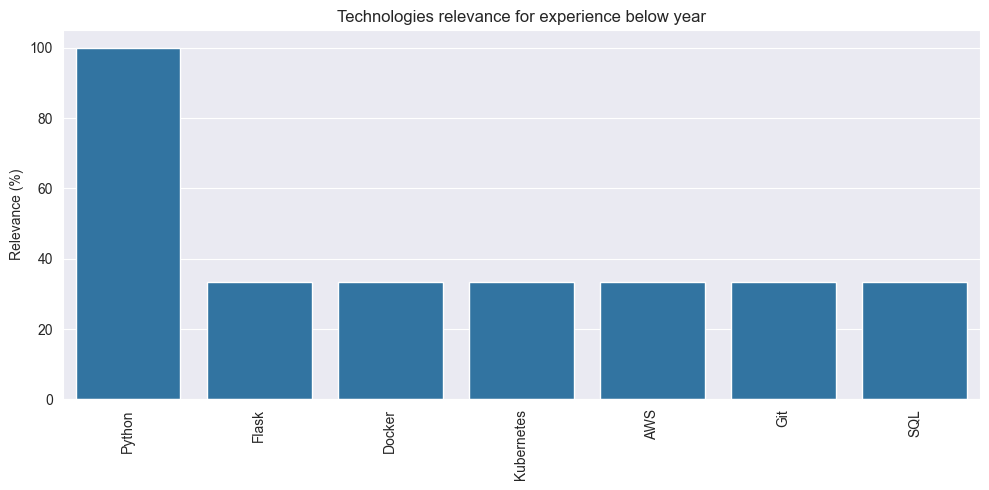

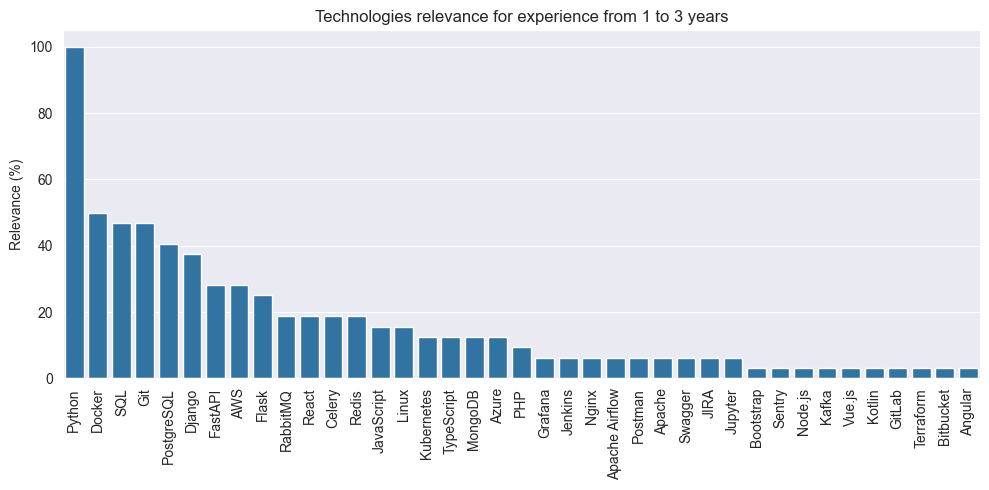

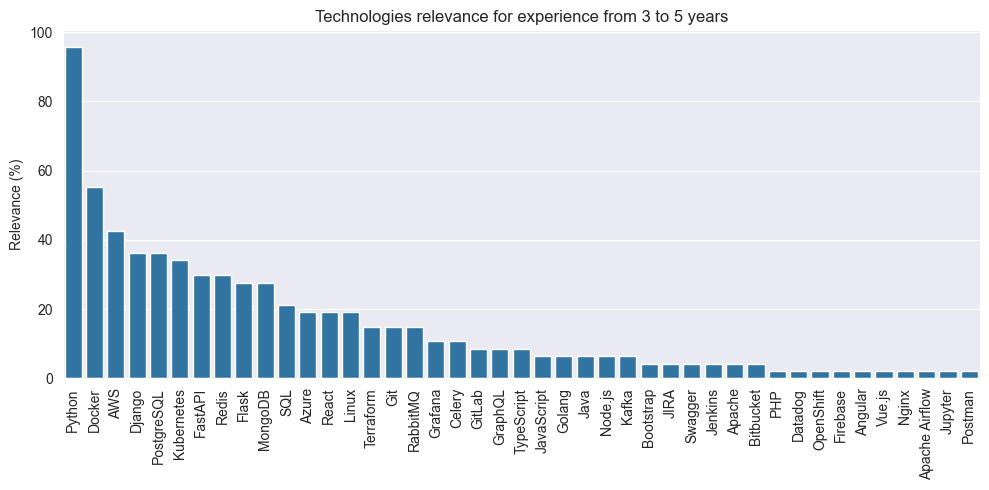

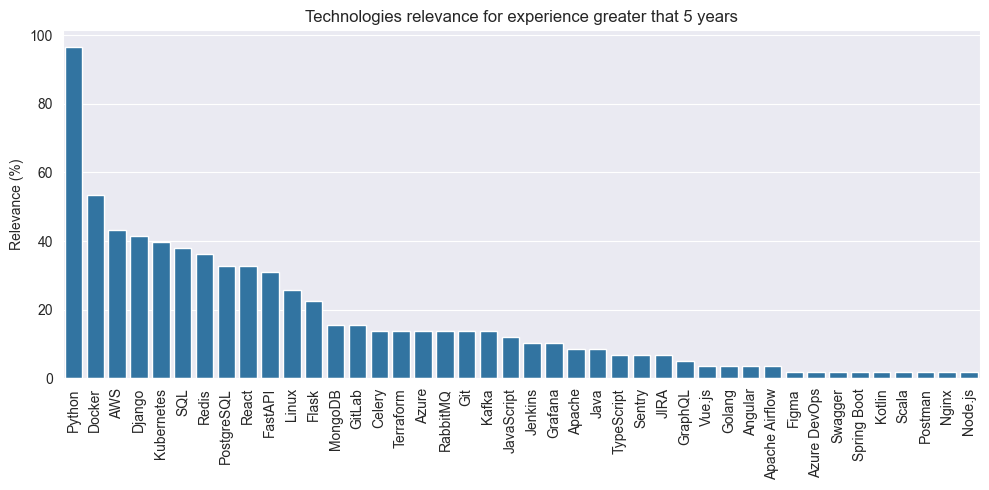

In [6]:
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_technology_relevance(data: DataFrame, exp: str):
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x="Technology", y="Percentage",
        data=data.sort_values(by="Percentage", ascending=False)
    )
    plt.xticks(rotation=90)
    plt.title(f"Technologies relevance for experience {exp}")
    plt.ylabel("Relevance (%)")
    plt.xlabel("")
    plt.tight_layout()
    plots.append(plt.gcf())
    plt.show()

df_technologies_exp = df_technologies.explode("Technologies")
exp_counts = df_technologies.groupby(df_technologies.index).size()

for experience, group in df_technologies_exp.groupby(df_technologies_exp.index):
    tech_counter = group["Technologies"].value_counts()
    tech_data = pd.DataFrame({
        "Technology": tech_counter.index,
        "Count": tech_counter.values
    })
    
    tech_data["Percentage"] = (tech_data["Count"] / exp_counts[experience]) * 100
    
    plot_technology_relevance(tech_data, experience)


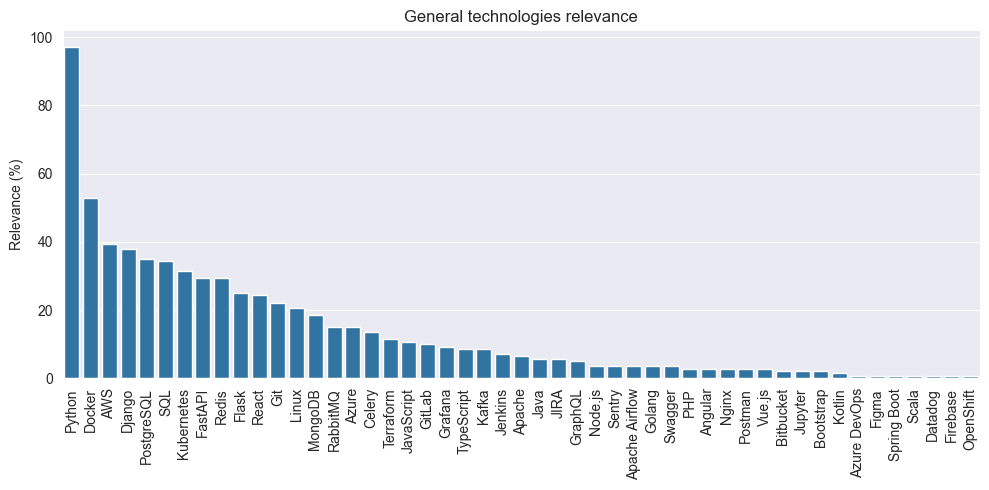

In [7]:
tech_series = df_technologies["Technologies"].explode()
tech_counter = tech_series.value_counts()

tech_data = pd.DataFrame({
    "Technology": tech_counter.index,
    "Count": tech_counter.values
})

tech_data["Percentage"] = tech_data["Count"] / len(df_technologies) * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Technology", y="Percentage", 
    data=tech_data.sort_values(by="Percentage", ascending=False)
)
plt.xticks(rotation=90)
plt.title("General technologies relevance")
plt.ylabel("Relevance (%)")
plt.xlabel("")
plt.tight_layout()
plots.append(plt.gcf())
plt.show()

<h3>Additional statistics</h3>

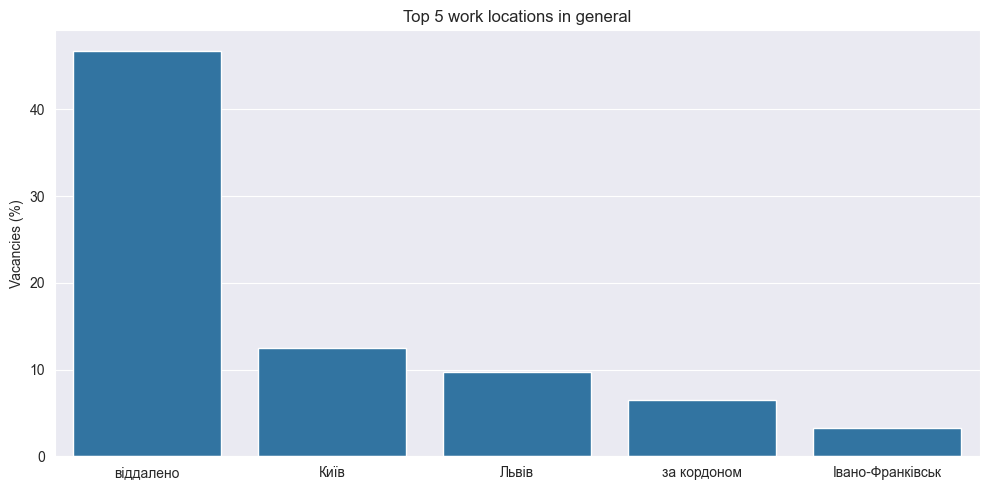

In [8]:
df_exploded = df.explode("Location")

locations_counter = df_exploded["Location"].value_counts()
locations_data_df = pd.DataFrame(locations_counter.items(), columns=["Location", "Count"])
locations_data_df = locations_data_df.head(5)

locations_data_df["Percentage"] = locations_data_df["Count"] / len(df_exploded) * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Location", y="Percentage", 
    data=locations_data_df.sort_values(by="Percentage", ascending=False)
)
plt.title("Top 5 work locations in general")
plt.ylabel("Vacancies (%)")
plt.xlabel("")
plt.tight_layout()
plots.append(plt.gcf())
plt.show()

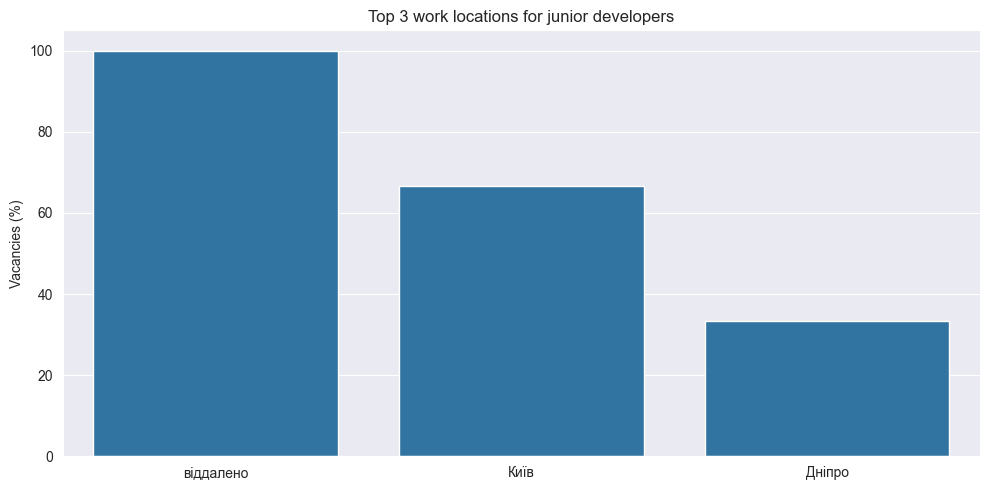

In [9]:
junior_df = df[df["Experience"] == "below year"]
locations_df = junior_df.explode("Location")
locations_counter = locations_df["Location"].value_counts()

top_locations_df = locations_counter.head(3).reset_index()
top_locations_df.columns = ["Location", "Count"]
top_locations_df["Percentage"] = top_locations_df["Count"] / len(junior_df) * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Location", y="Percentage",
    data=top_locations_df.sort_values(by="Percentage", ascending=False)
)
plt.title("Top 3 work locations for junior developers")
plt.ylabel("Vacancies (%)")
plt.xlabel("")
plt.tight_layout()
plots.append(plt.gcf())
plt.show()

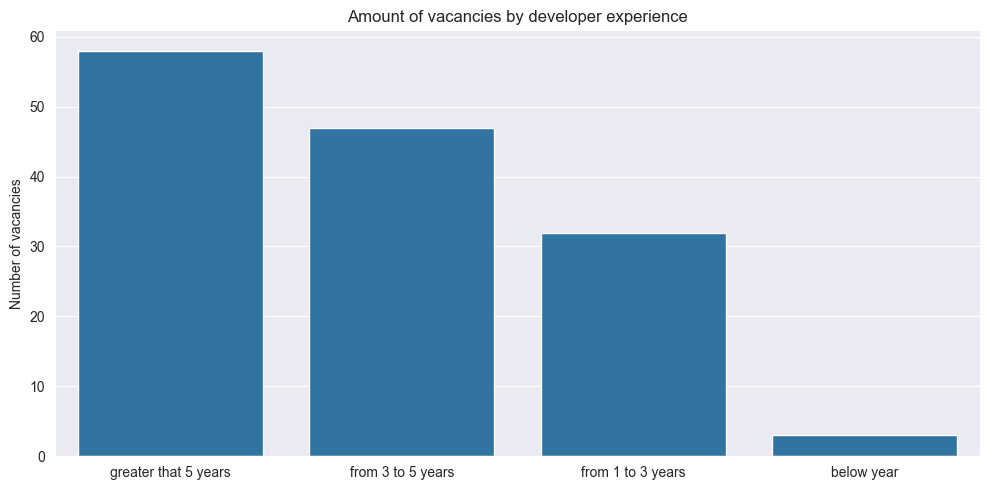

In [10]:
experience_counts = df["Experience"].value_counts()

experience_df = experience_counts.reset_index()
experience_df.columns = ["Experience", "Count"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Experience", y="Count",
    data=experience_df.sort_values(by="Count", ascending=False)
)
plt.title("Amount of vacancies by developer experience")
plt.ylabel("Number of vacancies")
plt.xlabel("")
plt.tight_layout()
plots.append(plt.gcf())
plt.show()

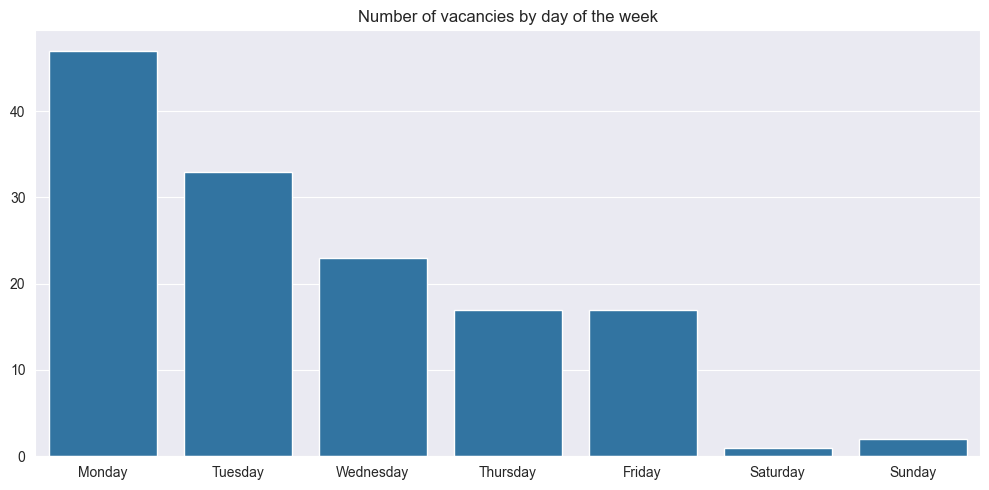

In [11]:
df["DayOfWeekName"] = pd.to_datetime(df["Date"]).dt.day_name()

vacancy_counts = df["DayOfWeekName"].value_counts()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
vacancy_df = vacancy_counts.reindex(day_order).reset_index()
vacancy_df.columns = ["DayOfWeek", "Vacancies"]

plt.figure(figsize=(10, 5))
sns.barplot(x="DayOfWeek", y="Vacancies", data=vacancy_df)
plt.title("Number of vacancies by day of the week")
plt.ylabel("")
plt.xlabel("")
plt.tight_layout()
plots.append(plt.gcf())
plt.show()

In [12]:
from matplotlib.backends.backend_pdf import PdfPages


with PdfPages(f"{location_prefix}app/{file_name.split(".")[0]}.pdf") as pdf:
    for plot in plots:
        pdf.savefig(plot)